In [21]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
train_df = pd.read_csv('/pio/scratch/1/i313924/data/train_data/train_slim_data.csv',
                 names=['asin', 'reviewerID', 'overall', 'unixReviewTime'])
train_df = train_df.rename(columns={"reviewerID": "u_id", "asin": "i_id", "overall": "rating"})
test_df = pd.read_csv('/pio/scratch/1/i313924/data/test_data/test_slim_data.csv',
                 names=['asin', 'reviewerID', 'overall', 'unixReviewTime'])
test_df = test_df.rename(columns={"reviewerID": "u_id", "asin": "i_id", "overall": "rating"})

In [23]:
model = pd.read_pickle('/pio/scratch/1/i313924/data/svd_data/model_1000_epochs_train_df.pkl')

In [24]:
pred = model.predict(train_df)
mae = mean_absolute_error(train_df['rating'], pred)
print(mae)
mse = mean_squared_error(train_df['rating'], pred)
print(mse)

0.0194446410254645
0.0028447443366573554


In [25]:
pred = model.predict(test_df)
mae = mean_absolute_error(test_df['rating'], pred)
print(mae)
mse = mean_squared_error(test_df['rating'], pred)
print(mse)

0.6383611976469461
0.9124998356333702


In [26]:
item_mapping = {v: k for k, v in model.item_mapping_.items()}
items_embeddings = pd.DataFrame(model.qi_)
items_embeddings = items_embeddings.rename(index=item_mapping)

## Embeddings PCA

In [32]:
item_embeddings = pd.DataFrame(model.qi_)
user_embeddings = pd.DataFrame(model.pu_)

In [33]:
item_embeddings 

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.105422,0.062357,-0.046651,0.059988,0.282077,0.086580,0.134351,-0.177649,-0.004423,0.084991,...,-0.044226,0.072695,-0.235705,0.205327,0.300164,0.062059,-0.342083,-0.137791,0.041349,-0.168485
1,-0.108823,-0.193058,-0.010885,-0.061833,0.142001,-0.103277,0.111256,0.254024,0.188502,-0.010078,...,0.144665,-0.049806,0.272401,0.024121,-0.079189,0.043640,-0.206208,-0.056834,-0.384248,-0.067419
2,-0.229467,-0.116945,0.174305,-0.081862,-0.240336,0.022312,0.081390,-0.347155,-0.147809,-0.168277,...,0.173505,-0.061828,0.075419,-0.184000,-0.050242,-0.026478,-0.029277,-0.000682,-0.055698,0.245256
3,0.055085,-0.204072,0.135569,0.232770,0.135326,0.046420,0.060887,0.143600,-0.038700,-0.228266,...,0.147841,0.056697,0.102063,-0.128211,-0.274658,-0.036879,0.208657,-0.104886,0.196975,-0.042403
4,-0.039764,-0.025065,0.216667,-0.147207,0.244122,-0.071668,-0.082563,-0.056882,-0.161417,0.146712,...,-0.181669,0.025987,-0.079812,-0.185203,-0.062942,-0.069585,-0.165879,-0.025621,-0.196338,0.230729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166891,0.015652,-0.220815,-0.097272,0.049006,-0.009666,-0.040906,0.163105,0.129247,-0.229835,0.170885,...,-0.265834,0.005259,-0.109610,-0.051362,0.076937,0.042826,0.086083,0.249263,-0.148214,-0.013088
166892,0.084939,0.146854,0.079985,0.091121,0.074785,0.032126,-0.069724,-0.052650,0.021104,0.087270,...,-0.043813,0.009935,-0.133507,-0.218459,0.040840,0.015230,-0.274296,0.176326,-0.020868,0.072397
166893,0.017726,0.109443,-0.051837,-0.165009,-0.001206,-0.210379,0.129342,-0.014978,0.106970,-0.096605,...,-0.081233,-0.137331,-0.092871,-0.117726,-0.034488,-0.120116,0.045653,0.126271,0.051103,0.116267
166894,0.167801,-0.034330,-0.105930,-0.105830,-0.152209,0.036630,0.039875,-0.069210,0.135634,-0.131508,...,-0.211571,0.086691,-0.138792,0.117710,-0.073391,-0.023379,0.069544,0.099947,-0.025514,-0.110633


In [34]:
embeddings = pd.concat([item_embeddings, user_embeddings], keys=['items', 'users'])

In [35]:
pca = PCA(n_components=2)
pca.fit(embeddings)

PCA(n_components=2)

In [36]:
reduced_item_embeddings = pd.DataFrame(pca.transform(embeddings.loc["items"]))
reduced_user_embeddings = pd.DataFrame(pca.transform(embeddings.loc["users"]))

In [38]:
item_mapping = {v: k for k, v in model.item_mapping_.items()}
user_mapping = {v: k for k, v in model.user_mapping_.items()}

In [39]:
reduced_item_embeddings = reduced_item_embeddings.rename(index=item_mapping)

In [40]:
categories = pd.read_json('/pio/scratch/1/recommender_systems/interim/Amazon/meta_Clothing_Shoes_and_Jewelry_categories.json', lines=True)

In [41]:
reduced_item_embeddings = reduced_item_embeddings.join(categories.set_index('asin'))

In [42]:
reduced_item_embeddings.columns = ['0', '1', 'category_1', 'category_2']

<AxesSubplot:xlabel='0', ylabel='1'>

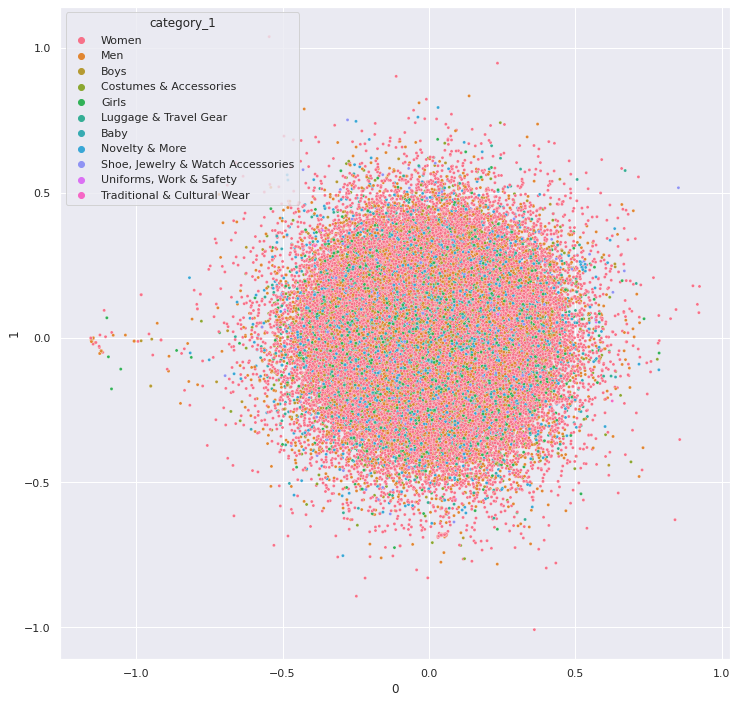

In [43]:
sns.set(rc={'figure.figsize':(12,12)})
sns.scatterplot(x='0', y='1', data=reduced_item_embeddings, hue='category_1', s=10)

<AxesSubplot:xlabel='0', ylabel='1'>

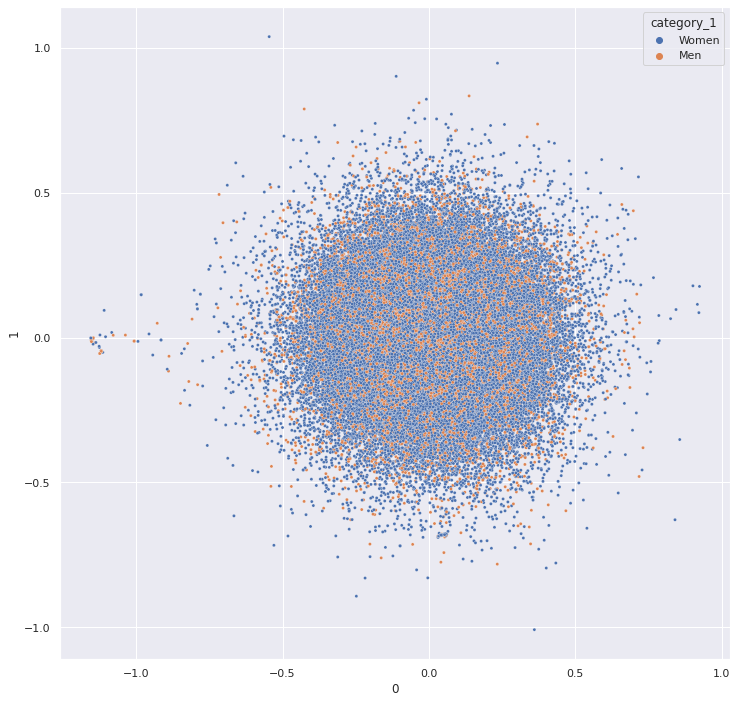

In [44]:
sns.scatterplot(x='0', y='1', data=reduced_item_embeddings[reduced_item_embeddings['category_1'].isin(['Women', 'Men'])], hue='category_1', s=10)